<div class="alert alert-block alert-info">
<center> <h1> MACHINE LEARNING MDSAA-BA </h1> </center> <br>
<center> TECHSCAPE PROJECT 2021/2022 </center>

### TO DO:

Group members: <br>
António Fonseca r2018 <br>
João Carvalho r2018 <br>
Lucas Lopes r2018 <br>
Mariana Ferreira r20181071 <br>
Tiago Sousa r20181077

**Table of Contents** <br>
* [1) Import](#import)
    * [1.1) Import Libraries](#importlibraries)
    * [1.2) Import the Dataset](#importdataset)
* [2) Data Exploration](#dataexploration)
    * [2.1) Check for Missing Values](#missingvalues)
    * [2.2) Change Data Types](#datatypes)
    * [2.3) Data Visualization](#datavisualization)
    * [2.4) Coherence Checking](#coherence)
* [3) Feature Engineering](#feateng)   
* [4) Feature Selection](#featsel)   
    * [4.1) For Metric Features](#selection_metric)
    * [4.2) For Non-metric Features](#selection_non_metric)
    * [4.3) Choose the most relevant Features](#relevantfeat)
    * [4.4) Final Insights](#finalinsights)
* [5) Model Training](#mdltrain) 
    * [5.1) Function to run all grids](#rungrids)
    * [5.2) Function to the test the performance of the models](#functperfor)
    * [5.3) Models to test](#modeltest)
        * [5.3.1) Decision Tree](#dt)
        * [5.3.2) Neural Network](#nn)
        * [5.3.3) K-Nearest Neighbors](#knn)
        * [5.3.4) Naive Bayes](#nb)
        * [5.3.5) Support Vector Machine](#svm)
        * [5.3.6) Ridge Classifier](#rc)
        * [5.3.7) Ensemble Methods](#em)
        * [5.3.7.1) Bagging meta-estimator](#b)
        * [5.3.7.2) Random Forest](#rf)
        * [5.3.7.3) Extremely Randomized Trees](#erf)
        * [5.3.7.4) ADA Boost](#ada)
        * [5.3.7.5) Histogram-Based Gradient Boosting](#hgb)
        * [5.3.7.6) Gradient Boost](#gb)
        * [5.3.7.7) Stacking](#s)
        * [5.3.8) Choose the Best Model and the Best Scalling Method](#best)
    * [5.4) Performance Measures](#perfmeasures)
* [6) Model Deployment](#deployment) 
    
        

<a class="anchor" id="import">

# 1. Import

</a>

<a class="anchor" id="importlibraries">

## 1.1) Import Libraries

</a>

In [1]:
import pandas as pd
import math
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from math import ceil

import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import IsolationForest

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

from sklearn.decomposition import PCA

from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="importdataset">

## 1.2. Import the Dataset

</a>

In [2]:
techscape = pd.read_csv('train.csv')

print(techscape.shape)
techscape.head(3)

(9999, 17)


,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0,0.0000,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0,0.0250,0.0583,0.0,Windows,4,Italy,1,Returner,0


In [3]:
# See descriptive statistics for the numeric variables
techscape.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Access_ID,9999.0,451972765.8,202498979.6,102863333.0,273194966.0,453616869.0,625975569.5,798444008.0
AccountMng_Pages,9999.0,2.3,3.3,0.0,0.0,1.0,4.0,27.0
AccountMng_Duration,9999.0,81.2,179.7,0.0,0.0,7.5,92.2,3398.8
FAQ_Pages,9999.0,0.5,1.3,0.0,0.0,0.0,0.0,24.0
FAQ_Duration,9999.0,34.6,139.8,0.0,0.0,0.0,0.0,2549.4
Product_Pages,9999.0,31.7,44.6,0.0,7.0,18.0,38.0,705.0
Product_Duration,9999.0,1199.8,1958.3,0.0,183.6,599.0,1470.3,63973.5
GoogleAnalytics_BounceRate,9999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
GoogleAnalytics_ExitRate,9999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
GoogleAnalytics_PageValue,9999.0,6.0,18.8,0.0,0.0,0.0,0.0,361.8


<a class="anchor" id="dataexploration">

# 2) Data Exploration

</a>

<a class="anchor" id="missingvalues">

## 2.1) Check for Missing Values

</a>

In [4]:
techscape.info()
# There are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

<a class="anchor" id="datatypes">

## 2.2) Change Data Types

</a>

In [5]:
def change_data_types(df):
    # ID does not make sense to be a int
    df.Access_ID = df.Access_ID.astype('string') 

    # Tranform Date into a datetime format
    df.Date = pd.to_datetime(df.Date)
    
    # Transform these variables into Strings
    df.OS = df.OS.astype('string') 
    df.Country = df.Country.astype('string') 
    df.Type_of_Visitor = df.Type_of_Visitor.astype('string') 
    df.Type_of_Traffic = df.Type_of_Traffic.astype('string') 
    df.Browser = df.Browser.astype('string') 
    
    return df


# Call the function created above (with techscape)
techscape = change_data_types(techscape)
techscape.dtypes

Access_ID                             string
Date                          datetime64[ns]
AccountMng_Pages                       int64
AccountMng_Duration                  float64
FAQ_Pages                              int64
FAQ_Duration                         float64
Product_Pages                          int64
Product_Duration                     float64
GoogleAnalytics_BounceRate           float64
GoogleAnalytics_ExitRate             float64
GoogleAnalytics_PageValue            float64
OS                                    string
Browser                               string
Country                               string
Type_of_Traffic                       string
Type_of_Visitor                       string
Buy                                    int64
dtype: object

<a class="anchor" id="datavisualization">

## 2.3) Data Visualization

</a>

In [6]:
non_metric_feat=['Access_ID','Date','OS','Browser','Country','Type_of_Traffic','Type_of_Visitor','Buy']
metric_feat=techscape.columns[~techscape.columns.isin(non_metric_feat)]

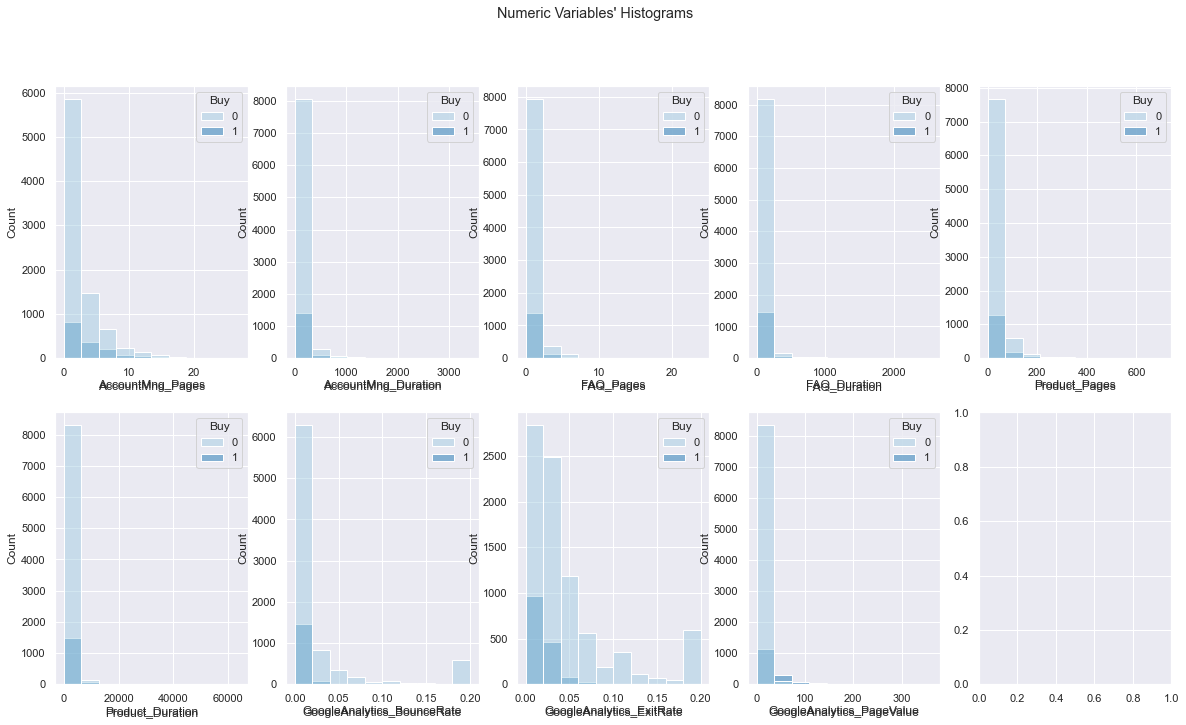

In [7]:
sns.set()
fig, axes = plt.subplots(2, ceil(len(metric_feat) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), techscape[metric_feat]):
    sns.histplot(ax=ax, data=techscape, x=feat, hue ='Buy', bins = 10, palette = "Paired")
    ax.set_title(feat, y=-0.13)
    
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

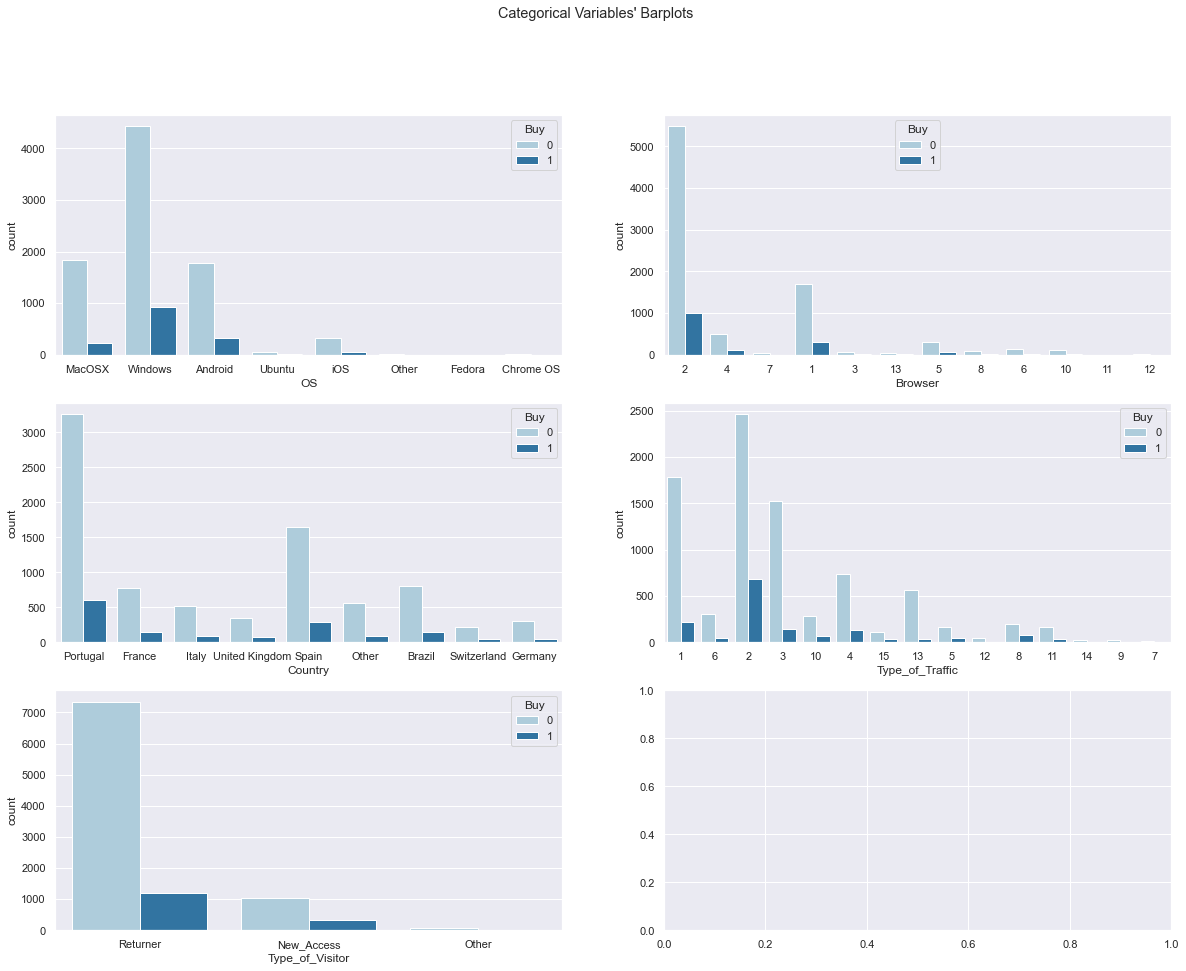

In [8]:
sns.set()
fig, axes = plt.subplots(3, ceil(len(non_metric_feat) / 4), figsize=(20, 15))

for ax, feat in zip(axes.flatten(), techscape[['OS', 'Browser', 'Country', 'Type_of_Traffic', 'Type_of_Visitor']]):
    sns.countplot(techscape[feat].astype(object), ax=ax, palette='Paired', hue = techscape['Buy'])
    #sns.barplot(ax=ax, data=techscape, x=techscape[feat].unique(), y = feat, hue ='Buy', palette = "flare")
    
    
title = "Categorical Variables' Barplots"

plt.suptitle(title)

plt.show()

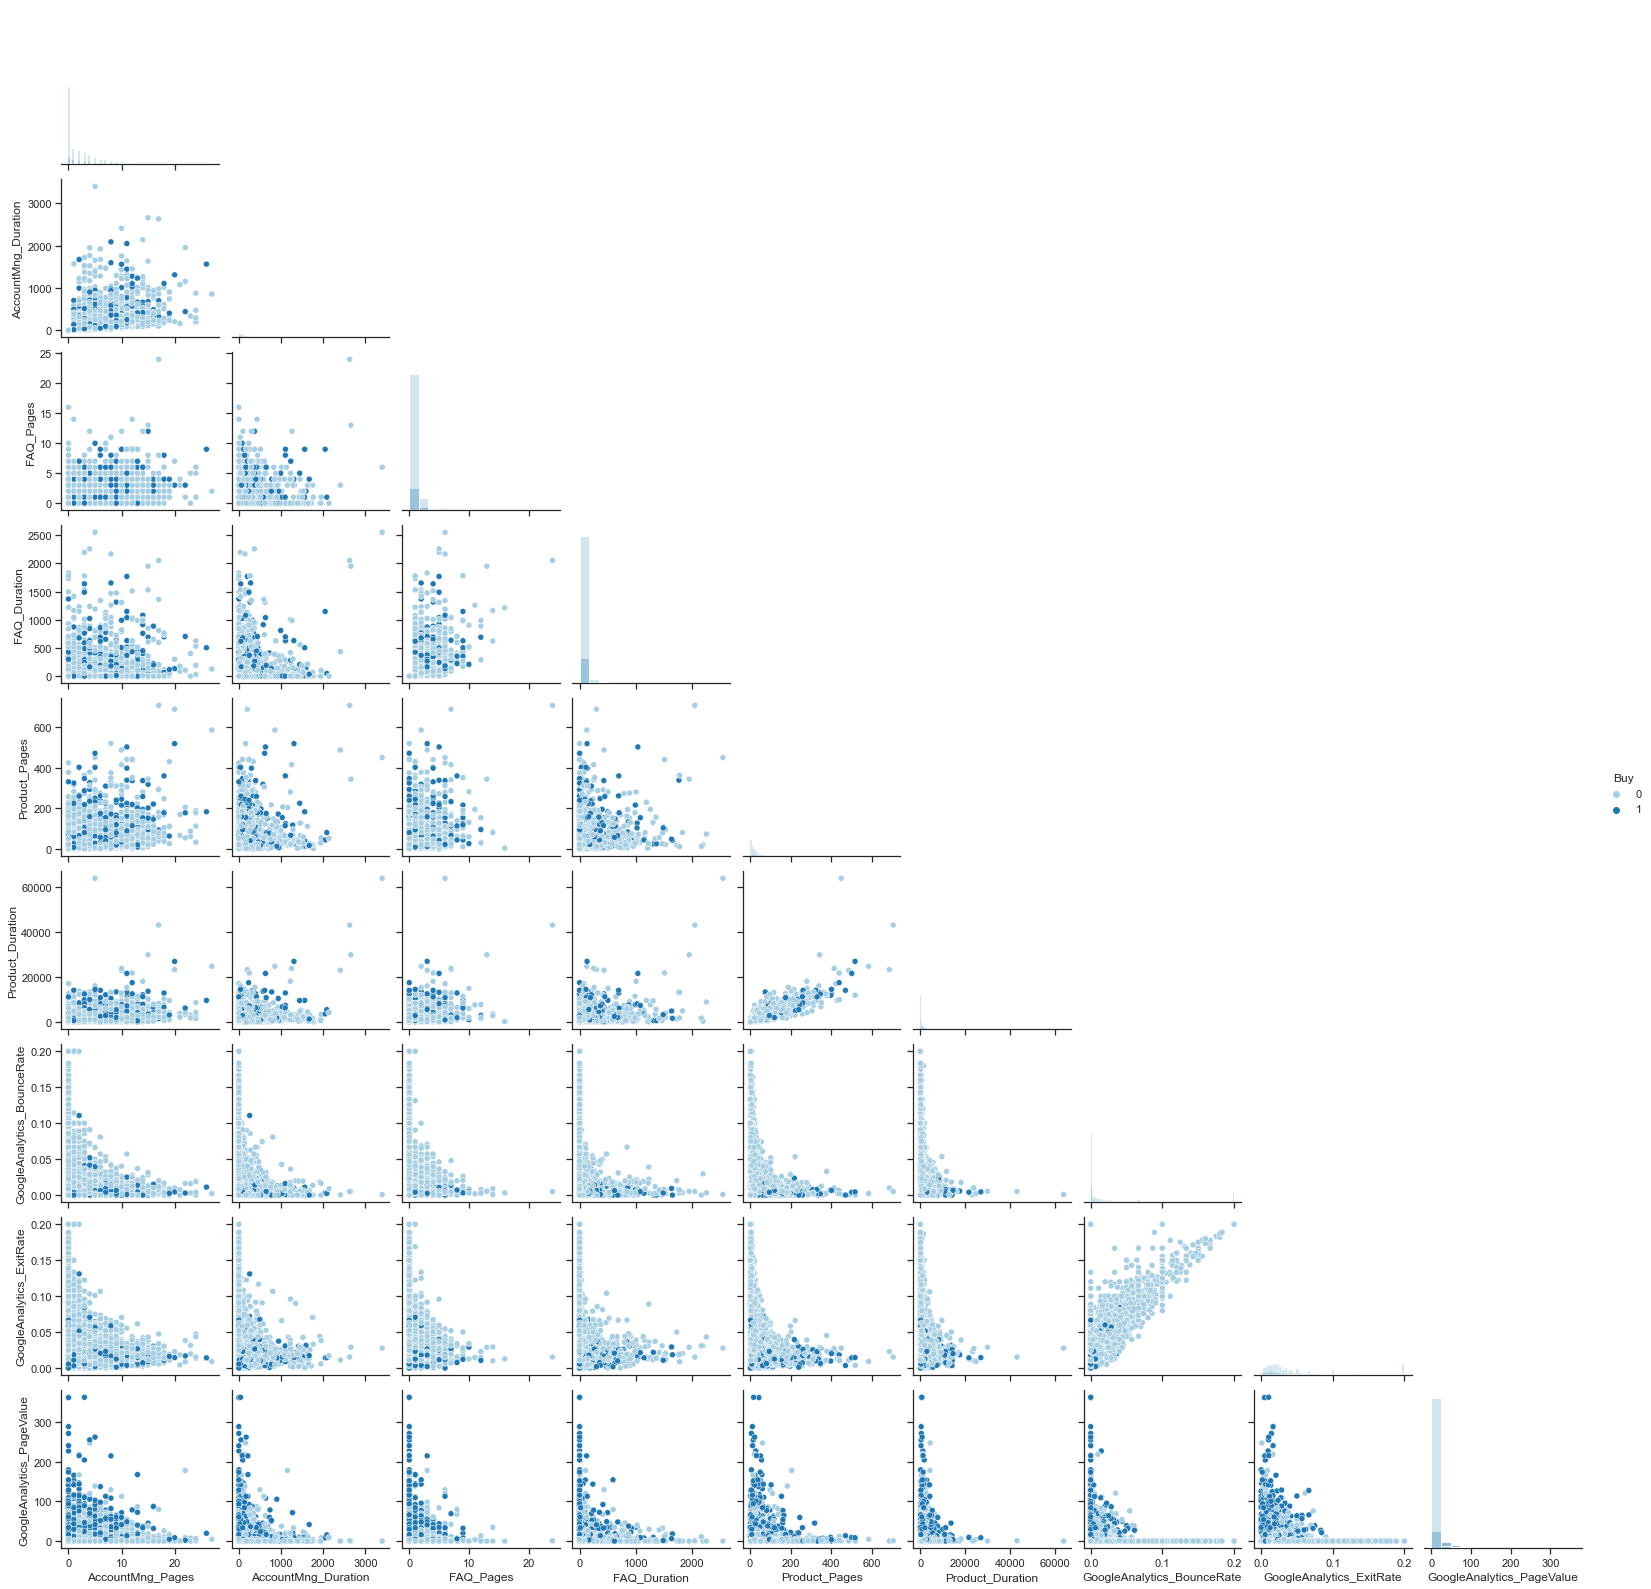

In [9]:
sns.set_style("ticks")
sns.pairplot(techscape, hue = 'Buy', diag_kind = "hist", kind = "scatter", palette = "Paired", corner = True)
plt.show()

<a class="anchor" id="coherence">

## 2.4) Coherence Checking

</a>

In [10]:
# # Incoherencies between Pages and Duration variables
# def inchorencies_check(df):
    
#     mng_pages_index = df[(df['AccountMng_Pages']==0) & (df['AccountMng_Duration']>0) ].index # --> 0
#     df.loc[mng_pages_index,'AccountMng_Pages'] = 1

#     mng_duration_index = df[(df['AccountMng_Pages']>0) & (df['AccountMng_Duration']==0) ].index  # --> 3
#     df.loc[mng_duration_index,'AccountMng_Duration'] = 1


#     # --------------------------------------------------------------
#     faq_pages_index = df[(df['FAQ_Pages']==0) & (df['FAQ_Duration']>0) ].index # --> 0
#     df.loc[faq_pages_index,'FAQ_Pages'] = 1

#     faq_duration_index = df[(df['FAQ_Pages']>0) & (df['FAQ_Duration']==0) ].index  # --> 9
#     df.loc[faq_duration_index,'FAQ_Duration'] = 1


#     # --------------------------------------------------------------
#     prod_pages_index = df[(df['Product_Pages']==0) & (df['Product_Duration']>0) ].index # --> 0
#     df.loc[prod_pages_index,'Product_Pages'] = 1

#     prod_duration_index = df[(df['Product_Pages']>0) & (df['Product_Duration']==0) ].index  # --> 130
#     df.loc[prod_duration_index,'Product_Duration'] = 1
    
#     return df


# # Call the function created above (with techscape)
# techscape = inchorencies_check(techscape)
# techscape.shape

<a class="anchor" id="feateng">

# 3) Feature Engineering

</a>

In [11]:
def create_new_variables(df):
    
    # Create binary variables for the most common operating systems
    df['Apple'] = df['OS'].apply(lambda x: bool(1) if x == 'MacOSX' or x == 'iOS' else bool(0))  
    df['Windows'] = df['OS'].apply(lambda x: bool(1) if x == 'Windows' else bool(0))  
    df['Android'] = df['OS'].apply(lambda x: bool(1) if x == 'Android' else bool(0))

    # Create binary variables for type of visitors
    df['Returner'] = df['Type_of_Visitor'].apply(lambda x: bool(1) if x == 'Returner' else bool(0)) 
    df['New_Access'] = df['Type_of_Visitor'].apply(lambda x: bool(1) if x == 'New_Access' else bool(0))

    # Create the total duration of the visits and total number of page visits
    df['Total_Duration'] = df['AccountMng_Duration'] + df['FAQ_Duration'] + df['Product_Duration']
    df['Total_Pages'] = df['AccountMng_Pages'] + df['FAQ_Pages'] + df['Product_Pages']
        
    # Correct incoherent values of total_pages and total_duration
    df.loc[df['Total_Pages']==0,'Total_Pages']=1
    df.loc[df['Total_Duration']==0,'Total_Duration']=1

    # Create the proportion of time on each page type
    df['PropTime_AccountMng'] = df['AccountMng_Duration']/df['Total_Duration']
    df['PropTime_FAQ'] = df['FAQ_Duration']/df['Total_Duration']
    df['PropTime_Product'] = df['Product_Duration']/df['Total_Duration']

    # Create the proportion of visited pages of each type
    df['PropPages_AccountMng'] = df['AccountMng_Pages']/df['Total_Pages']
    df['PropPages_FAQ'] = df['FAQ_Pages']/df['Total_Pages']
    df['PropPages_Product'] = df['Product_Pages']/df['Total_Pages']

    # Create the average time spent per page and type of page
    df['AvgTimePerPage'] = df['Total_Duration'].div(df['Total_Pages'].values)

    df['AvgTimeOnAccountMng'] = df['AccountMng_Duration'].div(df['AccountMng_Pages'].values)
    df['AvgTimeOnFAQ'] = df['FAQ_Duration'].div(df['FAQ_Pages'].values)
    df['AvgTimeOnProduct'] = df['Product_Duration'].div(df['Product_Pages'].values)

    # Correct incoherent values of AvgTimeOnAccountMng, AvgTimeOnFAQ and AvgTimeOnProduct
    df.loc[df['AccountMng_Pages']==0,'AvgTimeOnAccountMng']=0
    df.loc[df['FAQ_Pages']==0,'AvgTimeOnFAQ']=0
    df.loc[df['Product_Pages']==0,'AvgTimeOnProduct']=0

    # Create the month of the visit
    df['Month'] = df['Date'].dt.month

    # Create variable Covid
    df['Covid'] = df['Month'].apply(lambda x: bool(1) if x>3 else bool(0))

    # Create dummy variables from the categorical ones
    df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
    month = pd.DataFrame(pd.get_dummies(df['Month'], drop_first = True, dtype=bool))

    df['Type_of_Traffic'] = df['Type_of_Traffic'].apply(lambda x: 'Traffic_' + str(x))
    type_traffic = pd.DataFrame(pd.get_dummies(df['Type_of_Traffic'], drop_first = True, dtype=bool))

    df['Browser'] = df['Browser'].apply(lambda x: 'Browser_' + str(x))
    browser = pd.DataFrame(pd.get_dummies(df['Browser'], drop_first = True, dtype=bool))
    
    country=pd.DataFrame(pd.get_dummies(df['Country'], drop_first = True, dtype=bool))

    df = pd.concat((df,month,type_traffic,browser,country), axis=1)
    
    # Remove unwanted columns from the dataset
    df.drop('OS', axis=1, inplace=True)
    df.drop('Country', axis=1, inplace=True)
    df.drop('Type_of_Visitor', axis=1, inplace=True)
    df.drop('Browser', axis=1, inplace=True)
    df.drop('Type_of_Traffic', axis=1, inplace=True)
    df.drop('Date', axis=1, inplace=True)
    df.drop('Month', axis=1, inplace=True)
    df.drop('Access_ID', axis=1, inplace=True)

    return df


# Call the function created above (with techscape)
techscape = create_new_variables(techscape)
print(techscape.shape)
display(techscape.head(3))

(9999, 70)


,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Buy,...,Browser_7,Browser_8,France,Germany,Italy,Other,Portugal,Spain,Switzerland,United Kingdom
0,0,0.0,0,0.0,3,64.0,0.0000,0.0667,0.0,0,...,False,False,False,False,False,False,True,False,False,False
1,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,0,...,False,False,True,False,False,False,False,False,False,False
2,0,0.0,0,0.0,8,95.0,0.0250,0.0583,0.0,0,...,False,False,False,False,True,False,False,False,False,False


In [12]:
# See descriptive statistics for the numeric variables
techscape.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,9999.0,2.32,3.34,0.00,0.00,1.00,4.00,27.00
AccountMng_Duration,9999.0,81.21,179.72,0.00,0.00,7.50,92.21,3398.75
FAQ_Pages,9999.0,0.51,1.28,0.00,0.00,0.00,0.00,24.00
FAQ_Duration,9999.0,34.56,139.80,0.00,0.00,0.00,0.00,2549.38
Product_Pages,9999.0,31.69,44.55,0.00,7.00,18.00,38.00,705.00
Product_Duration,9999.0,1199.77,1958.28,0.00,183.56,599.00,1470.27,63973.52
GoogleAnalytics_BounceRate,9999.0,0.02,0.05,0.00,0.00,0.00,0.02,0.20
GoogleAnalytics_ExitRate,9999.0,0.04,0.05,0.00,0.01,0.03,0.05,0.20
GoogleAnalytics_PageValue,9999.0,5.96,18.75,0.00,0.00,0.00,0.00,361.76
Buy,9999.0,0.16,0.36,0.00,0.00,0.00,0.00,1.00


<a class="anchor" id="featsel">

# 4) Feature Selection

</a>

In [13]:
# Define data as all the independent variables
data = techscape.drop(['Buy'], axis=1)

# Define target as the dependent variable
target = techscape['Buy']

In [14]:
# Subset of data including only the numerical features
data_metric = data.select_dtypes(include=np.number).set_index(data.index)
# Subset of data including only the non numerical features
data_non_metric = data.select_dtypes(exclude=np.number).set_index(data.index)
data_non_metric

,Apple,Windows,Android,Returner,New_Access,Covid,Dec,Feb,Jul,Jun,...,Browser_7,Browser_8,France,Germany,Italy,Other,Portugal,Spain,Switzerland,United Kingdom
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,True,False,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,True,False,True,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,True,False,True,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,True,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,True,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9995,False,True,False,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
9996,True,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
9997,False,True,False,True,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


<a class="anchor" id="selection_metric">

## 4.1) For Metric Features

</a>

### Filter Methods:

In [15]:
# Scale the data metric
data_metric_scaled = pd.DataFrame(MinMaxScaler().fit_transform(data_metric), columns = data_metric.columns)

# Check if any of the variables is univariate
data_metric_scaled.var()

# There aren't univariate variables
# Keep: all
# Remove: none

AccountMng_Pages              0.015309
AccountMng_Duration           0.002796
FAQ_Pages                     0.002842
FAQ_Duration                  0.003007
Product_Pages                 0.003993
Product_Duration              0.000937
GoogleAnalytics_BounceRate    0.059477
GoogleAnalytics_ExitRate      0.059647
GoogleAnalytics_PageValue     0.002687
Total_Duration                0.000891
Total_Pages                   0.003914
PropTime_AccountMng           0.022304
PropTime_FAQ                  0.005453
PropTime_Product              0.072971
PropPages_AccountMng          0.016076
PropPages_FAQ                 0.002479
PropPages_Product             0.020185
AvgTimePerPage                0.000952
AvgTimeOnAccountMng           0.000841
AvgTimeOnFAQ                  0.001380
AvgTimeOnProduct              0.001021
dtype: float64

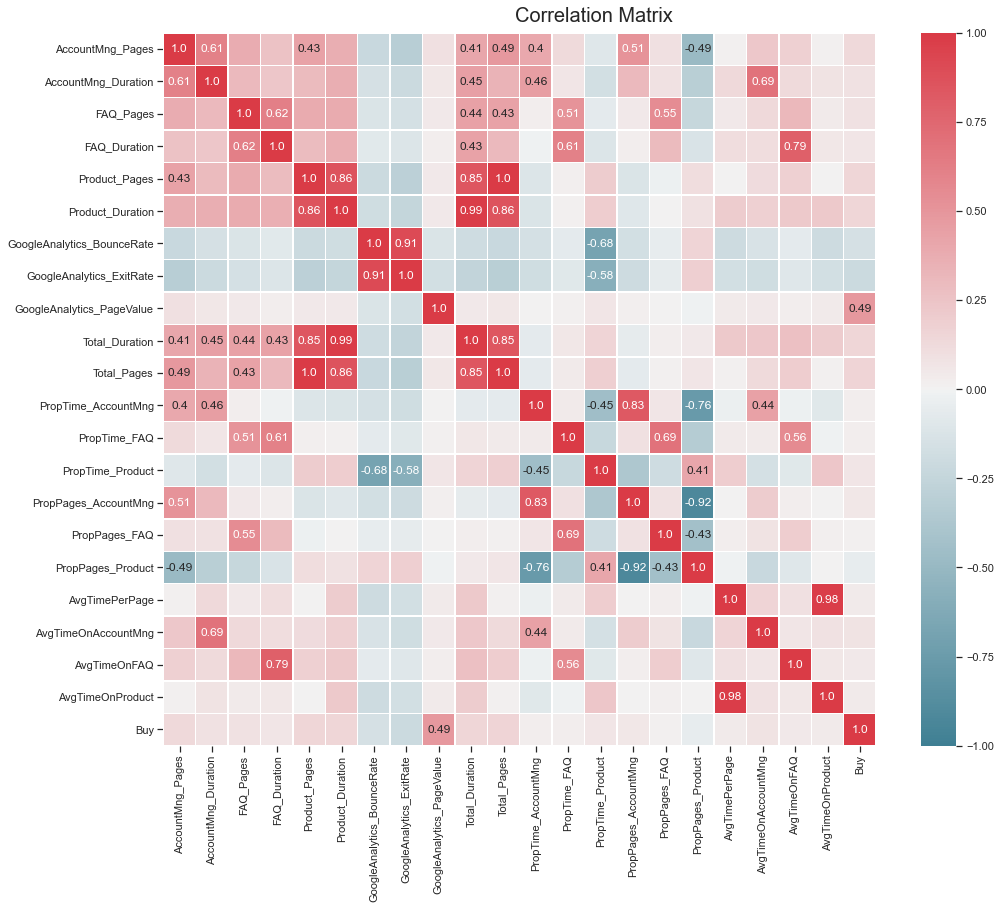

In [16]:
# ------------ Spearman Correlation ------------

# Check correlations
all_data = data_metric_scaled.join(target)

# Prepare figure
fig = plt.figure(figsize=(16, 12))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(all_data.corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.4| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.4
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)


plt.show()

### Wrapper and Embeded Methods:

In [17]:
# Create a Stratified KFold with 10 splits
skf = StratifiedKFold(n_splits=10)

In [18]:
#----------------------------- Lasso and Decision Tree -----------------------------
#fold = 1
#
#for train_index, val_index in skf.split(data_metric, target):
#        
#        # Data Partition
#        X_train, X_val = data_metric.iloc[train_index], data_metric.iloc[val_index]
#        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
#        
#        # Scaling the data with MinMaxScaler
#        scaler = MinMaxScaler().fit(X_train)
#        
#        X_train_metric_scaled = scaler.transform(X_train) # this will return an array
#        X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train.columns)#.set_index(X_train.index)
#
#        X_val_metric_scaled = scaler.transform(X_val)
#        X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val.columns)#.set_index(X_val.index)
#        
#        
#        # CODE FOR LASSO
#        reg = LassoCV()
#        lasso = reg.fit(X_train_metric_scaled, y_train)
#        importance = np.abs(lasso.coef_)
#        
#        # CODE FOR DT
#        gini_importance = DecisionTreeClassifier().fit(X = X_train_metric_scaled, y = y_train).feature_importances_
#        entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X = X_train_metric_scaled, y = y_train).feature_importances_
#        
#        
#        if fold == 1:
#            # Create three empty data frames
#            lasso_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#            gini_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#            entropy_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#            
#        importance_values = pd.Series(importance, index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#        gini_values = pd.Series(gini_importance, index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#        entropy_values = pd.Series(entropy_importance, index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#
#        lasso_results = pd.concat((lasso_results, importance_values), axis=1)
#        gini_results = pd.concat((gini_results, gini_values), axis=1)
#        entropy_results = pd.concat((entropy_results, entropy_values), axis=1)
#        
#        fold+=1
#               
#        
## Add new column with average of importance        
#importance_lasso_list = []
#importance_gini_list = []
#importance_entropy_list = []
#
#for index, row in lasso_results.iterrows():
#    count = 0
#    for elem in row:
#        count+=elem
#    average = count / 10
#    importance_lasso_list.append(average)
#
#for index, row in gini_results.iterrows():
#    count = 0
#    for elem in row:
#        count+=elem
#    average = count / 10
#    importance_gini_list.append(average)
#    
#for index, row in entropy_results.iterrows():
#    count = 0
#    for elem in row:
#        count+=elem
#    average = count / 10
#    importance_entropy_list.append(average)
#
#lasso_results['Average of LASSO Importance'] = importance_lasso_list 
#gini_results['Average of Gini Importance'] = importance_gini_list
#entropy_results['Average of Entropy Importance'] = importance_entropy_list
#dt_results = pd.merge(gini_results['Average of Gini Importance'], entropy_results['Average of Entropy Importance'], left_index = True, right_index = True)
#importance_results = pd.merge(dt_results, lasso_results['Average of LASSO Importance'], left_index = True, right_index = True)
#
#lasso_results.style.applymap(lambda x: 'background-color : green' if x > 0.01 else ('background-color : red' if x < -0.85 else ''))
#
#importance_results.sort_values(by=['Average of LASSO Importance','Average of Gini Importance','Average of Entropy Importance'], ascending=False)

In [19]:
#----------------------------- RFE -----------------------------
#fold = 1
#
#for train_index, val_index in skf.split(data_metric, target):
#        
#        # Data Partition
#        X_train, X_val = data_metric.iloc[train_index], data_metric.iloc[val_index]
#        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
#        
#        # Scaling the data with MinMaxScaler
#        scaler = MinMaxScaler().fit(X_train)
#        
#        X_train_metric_scaled = scaler.transform(X_train) # this will return an array
#        X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train.columns)#.set_index(X_train.index)
#
#        X_val_metric_scaled = scaler.transform(X_val)
#        X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val.columns)#.set_index(X_val.index)
#        
#        
#        # CODE FOR RFE
#        nof_list = np.arange(1,len(data_metric.columns)+1)  # Array from 1 to 21           
#        high_score = 0
#        nof = 0  # Variable to store the optimum number of features
#        
#        for n in nof_list:
#            
#            model = LogisticRegression()
#            rfe = RFE(model, n)
#            
#            X_train_rfe = rfe.fit_transform(X_train_metric_scaled,y_train)
#            X_val_rfe = rfe.transform(X_val_metric_scaled)
#            
#            model.fit(X_train_rfe,y_train)
#
#            score = model.score(X_val_rfe,y_val)
#            
#            if (score > high_score):
#                high_score = score
#                nof = n
#                selected_features = pd.Series(rfe.support_, index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#                
#        if fold == 1:
#            # Create empty data frame
#            rfe_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#        
#        # Concatenate variables chosen at each partition
#        rfe_results = pd.concat((rfe_results, selected_features), axis=1)
#        
#        print('Fold ',fold)
#        fold+=1
#
## Add new column with count of True's        
#count_rfe_list = []
#for index, row in rfe_results.iterrows():
#    count = 0
#    for elem in row:
#        if elem == True:
#            count+=1
#    count_rfe_list.append(count)
#
#rfe_results['Count'] = count_rfe_list
#
#rfe_results.sort_values(by='Count', ascending=False)

In [20]:
# ------------ Backward Regression  ------------
#fold = 1
#
#for train_index, val_index in skf.split(data_metric, target):
#        
#        # Data Partition
#        X_train, X_val = data_metric.iloc[train_index], data_metric.iloc[val_index]
#        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
#        
#        # Scaling the data with MinMaxScaler
#        scaler = MinMaxScaler().fit(X_train)
#        
#        X_train_metric_scaled = scaler.transform(X_train) # this will return an array
#        X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train.columns)#.set_index(X_train.index)
#
#        X_val_metric_scaled = scaler.transform(X_val)
#        X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val.columns)#.set_index(X_val.index)
#        
#        
#        # CODE FOR BACKWARD REGRESSION
#        sfs_backward = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=5, direction="backward")
#        sfs_backward.fit(X = X_train_metric_scaled, y = y_train)
#
#        selected_features = pd.Series(sfs_backward.support_, index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#        
#        if fold == 1:
#            # Create empty data frame
#            backward_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#            
#        backward_results = pd.concat((backward_results, selected_features), axis=1)
#        
#        print('Fold ',fold)
#        fold+=1
#        
#        
## Add new column with count of True's        
#count_backward_list = []
#for index, row in backward_results.iterrows():
#    count = 0
#    for elem in row:
#        if elem == True:
#            count+=1
#    count_backward_list.append(count)
#
#backward_results['Count'] = count_backward_list 
#backward_results.sort_values(by='Count', ascending=False)

In [21]:
# ------------ Forward Regression  ------------
#fold = 1
#
#for train_index, val_index in skf.split(data_metric, target):
#        
#        # Data Partition
#        X_train, X_val = data_metric.iloc[train_index], data_metric.iloc[val_index]
#        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
#        
#        # Scaling the data with MinMaxScaler
#        scaler = MinMaxScaler().fit(X_train)
#        
#        X_train_metric_scaled = scaler.transform(X_train) # this will return an array
#        X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train.columns)#.set_index(X_train.index)
#
#        X_val_metric_scaled = scaler.transform(X_val)
#        X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val.columns)#.set_index(X_val.index)
#        
#        
#        # CODE FOR FORWARD REGRESSION
#        sfs_forward = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=5, direction="forward")
#        sfs_forward.fit(X = X_train_metric_scaled, y = y_train)
#
#        selected_features = pd.Series(sfs_forward.support_, index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#        
#        if fold == 1:
#            # Create empty data frame
#            forward_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#            
#        forward_results = pd.concat((forward_results, selected_features), axis=1)
#        
#        print('Fold ',fold)
#        fold+=1
#        
#        
## Add new column with count of True's        
#count_forward_list = []
#for index, row in forward_results.iterrows():
#    count = 0
#    for elem in row:
#        if elem == True:
#            count+=1
#    count_forward_list.append(count)
#
#forward_results['Count'] = count_forward_list 
#
#forward_results.sort_values(by='Count', ascending=False)

In [22]:
# ------------ Select From Model ------------
#fold = 1
#
#for train_index, val_index in skf.split(data_metric, target):
#        
#        # Data Partition
#        X_train, X_val = data_metric.iloc[train_index], data_metric.iloc[val_index]
#        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
#        
#        # Scaling the data with MinMaxScaler
#        scaler = MinMaxScaler().fit(X_train)
#        
#        X_train_metric_scaled = scaler.transform(X_train) # this will return an array
#        X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train.columns)#.set_index(X_train.index)
#
#        X_val_metric_scaled = scaler.transform(X_val)
#        X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val.columns)#.set_index(X_val.index)
#        
#        
#        # CODE FOR SELECT FROM MODEL
#        threshold = np.sort(importance)[-3] + 0.01
#
#        sfm = SelectFromModel(lasso, threshold=threshold)
#        sfm.fit(X = X_train_metric_scaled, y = y_train)
#
#        selected_features = pd.Series(sfm.get_support(), index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#        
#        if fold == 1:
#            sfm_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#            
#        sfm_results = pd.concat((sfm_results, selected_features), axis=1)
#        
#        print('Fold ',fold)
#        fold+=1
#        
#        
## Add new column with count of True's        
#count_sfm_list = []
#for index, row in sfm_results.iterrows():
#    count = 0
#    for elem in row:
#        if elem == True:
#            count+=1
#    count_sfm_list.append(count)
#
#sfm_results['Count'] = count_sfm_list 
#
#sfm_results.sort_values(by='Count', ascending=False)

In [23]:
## Final table 
#final_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#
#final_results['Count RFE'] = count_rfe_list
#final_results['Count Backward'] = count_backward_list
#final_results['Count Forward'] = count_forward_list
#final_results['Count SFM'] = count_sfm_list
#
#final_results['Average Importance Lasso'] = importance_results['Average of LASSO Importance']
#final_results['Average Importance Gini'] = importance_results['Average of Gini Importance']
#final_results['Average Importance Entropy'] = importance_results['Average of Entropy Importance']
#
#final_results.sort_values(by = ['Average Importance Lasso', 'Average Importance Gini', 'Average Importance Entropy'], ascending = False, inplace = True)
#final_results

Final Result

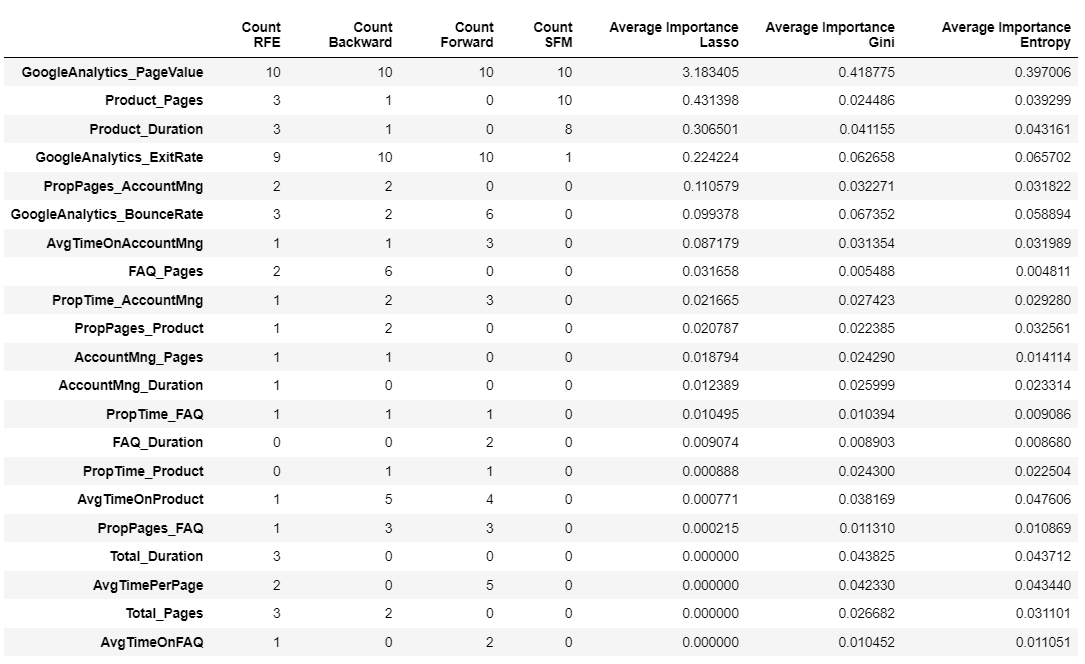

<a class="anchor" id="selection_non_metric">

## 4.2) For Non-metric Features

</a>

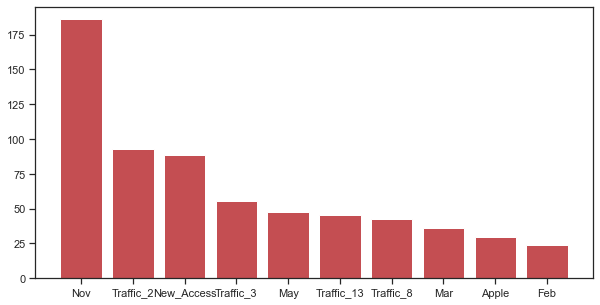

In [24]:
# Find the most important categorical features
kbest = SelectKBest(score_func = chi2, k=10)
kbest_fit = kbest.fit_transform(data_non_metric, target)
best = kbest.get_support()

indices = np.argsort(kbest.scores_)[::-1]

features = []
for i in range(10):
    features.append(data_non_metric.columns[indices[i]])

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.bar(features, kbest.scores_[indices[range(10)]], color='r', align='center')
plt.show()

# # 10 Most important: Nov, Traffic_2, New_Access, Traffic_3, May, Traffic_13, Traffic_8, Mar, Apple, Feb

In [25]:
# Chi-Square for categorical data

fold = 1

for train_index, val_index in skf.split(data_non_metric, target):
        
        # Data Partition
        X_train, X_val = data_non_metric.iloc[train_index], data_non_metric.iloc[val_index]
        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
        
        # CODE FOR Chi-Square
        if fold == 1:
            chi_square_results = pd.DataFrame(index = X_train.columns)
        
        importance_list = []
        
        for var in data_non_metric:
            
            dfObserved = pd.crosstab(y_train, X_train[var]) 
            chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
            dfExpected = pd.DataFrame(expected, columns = dfObserved.columns, index = dfObserved.index)

            if p < 0.05:
                importance_list.append(True)
            else: 
                importance_list.append(False)
            
        selected_features = pd.Series(importance_list, index = X_train.columns, name=f'Partition {fold}')    
      
        chi_square_results = pd.concat((chi_square_results, selected_features), axis=1)
        
        fold+=1
        
        
# Add new column with count of True's        
count_chi_square_list = []
for index, row in chi_square_results.iterrows():
    count = 0
    for elem in row:
        if elem == True:
            count+=1
    count_chi_square_list.append(count)

chi_square_results['Count'] = count_chi_square_list 

chi_square_results.sort_values(by='Count', ascending=False, inplace = True)

chi_square_results['Keep'] = chi_square_results['Count'].apply(lambda x: 'Yes' if x == 10 else 'No')
chi_square_results[chi_square_results['Keep'] == 'Yes']

,Partition 1,Partition 2,Partition 3,Partition 4,Partition 5,Partition 6,Partition 7,Partition 8,Partition 9,Partition 10,Count,Keep
Apple,True,True,True,True,True,True,True,True,True,True,10,Yes
Mar,True,True,True,True,True,True,True,True,True,True,10,Yes
Traffic_15,True,True,True,True,True,True,True,True,True,True,10,Yes
Windows,True,True,True,True,True,True,True,True,True,True,10,Yes
Traffic_13,True,True,True,True,True,True,True,True,True,True,10,Yes
Traffic_12,True,True,True,True,True,True,True,True,True,True,10,Yes
Traffic_8,True,True,True,True,True,True,True,True,True,True,10,Yes
Oct,True,True,True,True,True,True,True,True,True,True,10,Yes
Nov,True,True,True,True,True,True,True,True,True,True,10,Yes
Traffic_3,True,True,True,True,True,True,True,True,True,True,10,Yes


<a class="anchor" id="relevantfeat">

## 4.3) Choose the most relevant features

</a>

In [26]:
selected_features = ['GoogleAnalytics_PageValue', 
                   'GoogleAnalytics_ExitRate', 
                   'Product_Pages',
                   'AvgTimeOnAccountMng', 
                   'PropPages_AccountMng',
                   'Traffic_13',
                   'Traffic_12',
                   'Traffic_8',
                   'Traffic_3',
                   'Traffic_2',
                   'Traffic_15',
                   'Apple',
                   'Windows',
                   'Returner',
                   'New_Access',
                   'Covid',
                   'Dec',
                   'Feb',
                   'May',
                   'Mar',
                   'Nov',
                   'Oct',
                  ]

data_selected_features = data[selected_features]
data_selected_features.shape

(9999, 22)

In [27]:
# ------------------- Principal Components Analysis ------------

# Perform PCA to reduce dimensionality and retain the best combinations of the most important variables

data_pca = data_metric_scaled.copy() # para confirmar
pca = PCA()
pca_feat = pca.fit_transform(data_pca)
pca_feat
pd.DataFrame({"Eigenvalue": pca.explained_variance_,
            "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
             "Proportion": pca.explained_variance_ratio_,
             "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
            index=range(1, pca.n_components_ + 1))


,Eigenvalue,Difference,Proportion,Cumulative
1,1.570635e-01,0.000000e+00,5.250117e-01,0.525012
2,7.989735e-02,-7.716618e-02,2.670705e-01,0.792082
3,1.750803e-02,-6.238932e-02,5.852358e-02,0.850606
4,1.226846e-02,-5.239568e-03,4.100943e-02,0.891615
5,9.419205e-03,-2.849256e-03,3.148530e-02,0.923101
6,5.094061e-03,-4.325143e-03,1.702777e-02,0.940128
7,3.937045e-03,-1.157017e-03,1.316024e-02,0.953289
8,2.828060e-03,-1.108985e-03,9.453273e-03,0.962742
9,2.539887e-03,-2.881725e-04,8.490007e-03,0.971232
10,2.478584e-03,-6.130372e-05,8.285089e-03,0.979517


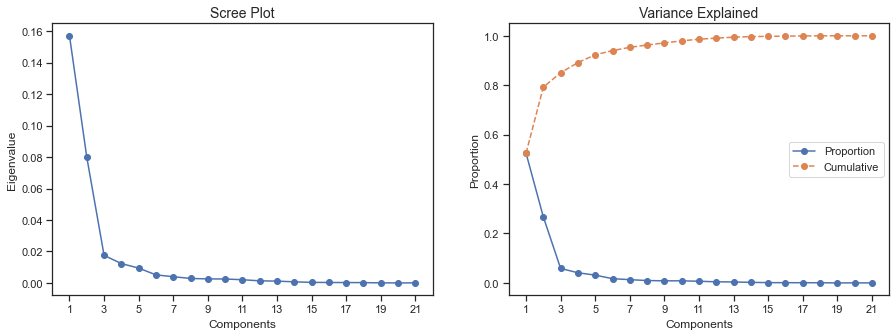

In [28]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [29]:
# Perform PCA again with the number of principal components to retain based on the 3 criteria -> 3 PCs
pca = PCA(n_components=3)
pca_feat = pca.fit_transform(data_pca)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=data_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
display(pca_df)

# If we want to select the variables from PCA
data_selected_pca = pca_df.copy()

,PC0,PC1,PC2
0,-0.084985,-0.222917,-0.105156
1,-0.086026,-0.215208,-0.051192
2,-0.036112,-0.236783,-0.075976
3,-0.206432,-0.165804,-0.063709
4,-0.140121,-0.005190,0.101278
...,...,...,...
9994,-0.150500,0.153618,0.013956
9995,0.285304,1.285639,-0.277443
9996,-0.107491,-0.210356,-0.062330
9997,-0.110885,-0.203939,-0.014134


In [30]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

data_pca = pd.concat([data_pca, pca_df], axis=1)
# Interpreting each Principal Component
loadings = data_pca[list(data_metric.columns) + pca_feat_names].corr().loc[list(data_metric.columns), pca_feat_names]
loadings.style.applymap(_color_red_or_green)

,PC0,PC1,PC2
AccountMng_Pages,-0.167117,0.595333,0.589080
AccountMng_Duration,-0.066651,0.484431,0.401047
FAQ_Pages,-0.085607,0.238553,0.597572
FAQ_Duration,-0.032660,0.181570,0.542642
Product_Pages,-0.282926,0.004829,0.757841
Product_Duration,-0.254702,-0.005205,0.695054
GoogleAnalytics_BounceRate,0.947210,-0.234619,0.078931
GoogleAnalytics_ExitRate,0.911484,-0.311372,-0.074475
GoogleAnalytics_PageValue,-0.135828,0.051857,0.090964
Total_Duration,-0.246811,0.048980,0.723070


<a class="anchor" id="mdltrain">

# 5) Model Training
    
</a>

In [31]:
def measures(y_train, pred_train , y_val, pred_val):
    
    print('______________________________________________________')
    print('                        TRAIN                         ')
    print('------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))
    print()
    print('______________________________________________________')
    print('                      VALIDATION                      ')
    print('------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))


In [32]:
def scaling(X_train, X_val, scaler):
    
        # Separate X_train in metric and non metric features
        X_train_metric = X_train.select_dtypes(include=np.number).set_index(X_train.index)
        X_train_non_metric = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

        # Separate X_val in metric and non metric features
        X_val_metric = X_val.select_dtypes(include=np.number).set_index(X_val.index)
        X_val_non_metric = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

        # Create a scalling method        
        scaler = scaler.fit(X_train_metric)

        # Scalling the X_train_metric
        X_train_metric_scaled = scaler.transform(X_train_metric) 
        X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train_metric.columns).set_index(X_train_metric.index)

        # Scalling the X_val_metric
        X_val_metric_scaled = scaler.transform(X_val_metric) 
        X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val_metric.columns).set_index(X_val.index)


        # Join the X_train and X_val back together
        X_train = X_train_metric_scaled.join(X_train_non_metric)
        X_val = X_val_metric_scaled.join(X_val_non_metric)  
        
        return X_train, X_val

In [33]:
def removing_outliers(X_train, y_train):
    
        # Join X and y training part
        X_y_train = X_train.join(y_train)

        iforest = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.02, 
                                  max_features=1.0, bootstrap=False, n_jobs=-1, random_state=1)

        # Returns 1 of inliers, -1 for outliers
        pred = iforest.fit_predict(X_train)

        # Extract outliers
        inlier_index = np.where(pred==1)

        X_y_train_filtered = X_y_train.iloc[inlier_index]   

        # Print percentage of outliers removed
        dif = X_y_train.shape[0] - X_y_train_filtered.shape[0]
        perc_outliers = np.round(dif / X_y_train.shape[0] * 100, 2)
        print(f'Percentage of outliers removed: {perc_outliers}% ({dif} observations)')

        # Define data as all the independent variables
        X_train = X_y_train_filtered.drop(['Buy'], axis=1)
        # Define target as the dependent variable
        y_train = X_y_train_filtered['Buy']
        
        return X_train, y_train

<a class="anchor" id="rungrids">

## 5.1) Function to run the grids
    
</a>

In [34]:
def run_grid(X, y, random_state, model, parameters, remove_outliers=False, scale_data=False, scaler=MinMaxScaler()):
    
    # Do a train_test_split with a predefined random_state
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, stratify = target, random_state=random_state)
    
    
###################### REMOVE OUTLIERS #######################
    if remove_outliers:
        X_train, y_train = removing_outliers(X_train, y_train)
        
###################### SCALE THE DATA ########################
    if scale_data:
        X_train, X_val = scaling(X_train, X_val, scaler)

###################### DEFINE OUR GRID SEARCH ################
    model_grid = GridSearchCV(estimator = model, param_grid = parameters, scoring='f1', n_jobs=-1, cv=2)
    
    grid_search = model_grid.fit(X_train, y_train)

    print(f'Best parameters= {grid_search.best_params_}')
    print(f'Best score= {grid_search.best_score_}')
    

<a class="anchor" id="rungrids">

## 5.2) Function to tune the models (avoid overfitting)
    
</a>

In [35]:
def check_overfitting(X, y, random_state, model, remove_outliers=False, scale_data=False, scaler=MinMaxScaler()):
    
    # Do a train_test_split with a predefined random_state
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.80, stratify = target, random_state=random_state)
    
    
###################### REMOVE OUTLIERS #######################
    if remove_outliers:
        X_train, y_train = removing_outliers(X_train, y_train)
        
###################### SCALE THE DATA ########################
    if scale_data:
        X_train, X_val = scaling(X_train, X_val, scaler)

###################### FIT OUR MODEL ######################
    model = model.fit(X_train, y_train)

    # Predict the dependent variable
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Calculate de f1 score
    value_train = f1_score(y_train, y_train_pred)
    value_val = f1_score(y_val, y_val_pred)

    # Print the results  
    print('Score of Train:', round(value_train, 5))
    print('Score of Valid:', round(value_val, 5))
    print(f'Difference between Train and Validation: {round(value_train-value_val, 5)}')
    
    
###################### PLOT ROC CURVE ######################   
    plt.figure(figsize=(10,5))
    fpr, tpr, thresholds = metrics.roc_curve(y_train, model.predict_proba(X_train)[:,1])
    auc = metrics.roc_auc_score(y_train,y_train_pred)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('Train', auc))
        
    fpr, tpr, thresholds = metrics.roc_curve(y_val, model.predict_proba(X_val)[:,1])
    auc = metrics.roc_auc_score(y_val,y_val_pred)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('Validation', auc))
        
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # Call fucntion measures
    measures(y_train, y_train_pred, y_val, y_val_pred)
    

<a class="anchor" id="functperfor">

## 5.3) Function to the test the performance of the models with Kfolds
    
</a>

In [36]:
def avg_score(X, y, split_method, remove_outliers, scale_data, model, scaler=MinMaxScaler()):
    
    score_train = []
    score_val = []
    overfit = []
    
    fold=1
    
    for train_index, test_index in split_method.split(X, y=target):
        
        # Data Partition
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]
        
#         print(f'### Fold {fold} ###')

###################### REMOVE OUTLIERS #######################
        if remove_outliers:
            X_train, y_train = removing_outliers(X_train, y_train)
        
###################### SCALE THE DATA ########################
        if scale_data:
            X_train, X_val = scaling(X_train, X_val, scaler)    

###################### FIT OUR MODEL ######################
        model = model.fit(X_train, y_train) 

        # Predict the dependent variable
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)

        # Calculate de f1 score
        value_train = f1_score(y_train, y_train_pred)
        value_val = f1_score(y_val, y_val_pred) 
        value_overfit = np.abs(value_train-value_val)
        
#         print(f'Train: {round(value_train,5)}')
#         print(f'Valid: {round(value_val,5)}')
#         print(f'Overfit: {round(value_overfit,5)}')
#         print('----------------')
        
        # Append results to the lists created above
        score_train.append(value_train)
        score_val.append(value_val)
        overfit.append(value_overfit)
        fold+=1
        
    # Print the results  
    print('\nAverage score of Train:', round(np.mean(score_train), 5))
    print('Average score of Valid:', round(np.mean(score_val), 5))
    print(f'Average of overfit: {round(np.mean(overfit), 5)}')


### Scaling Options

In [37]:
skf = StratifiedKFold(n_splits=5)

# ---------- MINMAX SCALER ----------
min_max = MinMaxScaler()
min_max2 = MinMaxScaler(feature_range = (-1,1))

# ---------- STANDARD SCALER ----------
standard_scaler = StandardScaler()

# ---------- ROBUST SCALER ----------
robust_scaler = RobustScaler()


# LIST WITH ALL SCALLING METHODS
scalling = [min_max, min_max2, standard_scaler, robust_scaler]

<a class="anchor" id="modeltest">

## 5.4) Models to test
    
</a>

<a class="anchor" id="dt">

### 5.4.1) Decision Tree
    
</a>

In [38]:
scaler_dt = min_max2

model_dt = DecisionTreeClassifier()

param_dt = {
    'criterion': ['gini', 'entropy'], 
    'splitter': ['best', 'random'],
    'max_depth': [4,5,6,7],
    'min_samples_split': [200,300],
    'min_samples_leaf': [200,300],
#    'min_weight_fraction_leaf': [0.0],
    'max_features': [2,4,6, None],
#   'random_state'=None,
    'max_leaf_nodes': [4,8, None],
#    'min_impurity_decrease'=0.0,
#    'min_impurity_split'=None,
#    'class_weight'=None,
#    'ccp_alpha'=0.0,
    }

# # ------------------------------------------
# run_grid(data, target, random_state=0, remove_outliers=False, scale_data=False, 
#          model=model_dt, parameters=param_dt)

In [39]:
DecisionTree = DecisionTreeClassifier(    
        criterion='entropy',
        max_depth= 7, 
        max_features= None,
        splitter='best',
        max_leaf_nodes= None,
        min_samples_leaf= 300,
        min_samples_split= 300,
        )

# -------------------------------------------------------------------------------------------
# check_overfitting(data, target, random_state=0, remove_outliers=False, scale_data=False, model=DecisionTree)

In [40]:
# avg_score(data, target, split_method=skf, remove_outliers=True, scale_data=False, model=DecisionTree)

<a class="anchor" id="nn">

### 5.4.2) Neural Network
    
</a>

In [41]:
scaler_nn = min_max

model_nn = MLPClassifier()

param_nn = {
    'hidden_layer_sizes': [(8),(6),(4),(6,3),(8,4),(8,4,2)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter' : [100,200],
    'learning_rate_init' :[0.001,0.01,0.05,0.1]
}

# run_grid(data_selected_features, target, random_state=0, remove_outliers=False, scale_data=True, scaler=scaler_nn,
#           model=model_nn, parameters=param_nn)

In [42]:
NeuralNetwork = MLPClassifier(
    
    hidden_layer_sizes=(8,4),
    activation='tanh',
    solver='adam',
    alpha=0.001,
    learning_rate='adaptive',
    learning_rate_init=0.1,
    max_iter=100,
    random_state=None,
)

# -------------------------------------------------------------------------------------------
#check_overfitting(data_selected_features, target, random_state=0, remove_outliers=False, scale_data=True, model=NeuralNetwork)

In [43]:
# avg_score(data, target, split_method=skf, remove_outliers=True, scale_data=True, model=NeuralNetwork)

<a class="anchor" id="knn">

### 5.4.3) K-Nearest neighbors
    
</a>

In [44]:
model_KNN = KNeighborsClassifier()

param_KNN = {
    'n_neighbors':[3,5,7],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto', 'kd_tree'], #'brute', 'ball_tree'], 
    'leaf_size':[10,30,40,80],
    'p' : [1,2,3],
    'metric' : ['euclidean', 'manhattan', 'minkowski'], #'mahalanobis'],
    'metric_params' : [None],
    'n_jobs' : [None, -1]
}

# run_grid(data_selected_features, target, random_state=0, remove_outliers=False, scale_data=True, model=model_KNN, parameters=param_KNN)             

In [45]:
model_KNN = KNeighborsClassifier(
            n_neighbors=3,
            weights='distance',
            algorithm='auto',
            leaf_size=20,
            p=1,
            metric='mahalanobis',
            metric_params=None,
            n_jobs=None,
        )


# check_overfitting(data_selected_features, target, random_state=100, remove_outliers=True, scale_data=True, model=KNN)

In [46]:
# avg_score(data, target, split_method=skf, remove_outliers=True, scale_data=True, model=model_KNN)

<a class="anchor" id="nb">

### 5.4.4) Naive Bayes
    
</a>

In [47]:
scaler_nb = min_max2
model_nb = GaussianNB()

param_nb = {'var_smoothing': [0.1, 0.01, 0.015, 0.001, 0.0001, 0.0000001]}


# run_grid(data_selected_features, target, random_state=0, remove_outliers=False, scale_data=True, model=model_nb, parameters=param_nb, scaler = scaler_nb)             

In [48]:
NaiveBayes = GaussianNB(
    var_smoothing = 0.001
)

# check_overfitting(data_selected_features, target, random_state=100, remove_outliers=True, scale_data=True, model=NaiveBayes, scaler = scaler_nb)

In [49]:
# avg_score(data, target, split_method=skf, remove_outliers=True, scale_data=True, model=NaiveBayes)

<a class="anchor" id="svm">

### 5.4.5) Support Vector Machines
    
</a>

In [50]:
# scaler_svm = min_max2
# model_svm = SVC()

# param_svm = {'kernel': ['poly','linear','rbf','sigmoid'],
#             'degree':[1,2,3,4],
#             'gamma':['scale','auto'],
#             'shrinking':[True,False],
#             'class_weight':[None, 'balanced'],
#             'verbose':[False, True],
#             'max_iter':[-1,1,2],
#             'decision_function_shape':['ovo','ovr']}

# run_grid(data_selected_features, target, random_state=0, remove_outliers=False, scale_data=True, model=model_svm, parameters=param_svm, scaler = scaler_svm)             

In [51]:
SVM = SVC(
    kernel = 'linear',
    degree = 1,
    gamma = 'scale',
    shrinking = True,
    class_weight = 'balanced',
    verbose = False,
    max_iter = -1,
    decision_function_shape = 'ovo'
)

# check_overfitting(data_selected_features, target, random_state=100, remove_outliers=True, scale_data=True, model=SVC, scaler = scaler_svm)

In [52]:
# avg_score(data, target, split_method=skf, remove_outliers=True, scale_data=True, model=SVM)

<a class="anchor" id="em">

### 5.4.7) Ensemble Methods
    
</a>

<a class="anchor" id="b">

#### 5.4.7.1) Bagging meta-estimator
    
</a>

In [53]:
scaler_b = min_max2
model_b = BaggingClassifier()

param_b = {
    'n_estimators': [20,80,100,200],
    'max_samples': [0.4,0.8,1.0],
    'max_features': [0.6,1.0],
    'bootstrap':[True, False],
    'bootstrap_features':[True, False],
    'warm_start':[True,False],
    'verbose':[0,1]
}

# run_grid(data_selected_features, target, random_state=0, remove_outliers=False, scale_data=True, model=model_b, parameters=param_b, scaler = min_max2)

In [54]:
bagging = BaggingClassifier(
    n_estimators = 150,
    max_samples = 0.3,
    max_features = 0.6,
    bootstrap = True,
    bootstrap_features = False,
    warm_start = False,
    verbose = 0
)

# check_overfitting(data_selected_features, target, random_state=100, remove_outliers=False, scale_data=True, model=bagging, scaler = scaler_b)

In [55]:
# avg_score(data, target, split_method=skf, remove_outliers=True, scale_data=True, model=bagging)

<a class="anchor" id="rf">

#### 5.4.7.2) Random Forest
    
</a>

In [56]:
scaler_rf = min_max2
model_rf = RandomForestClassifier()

param_rf = {
    'n_estimators': [100,200,250,300],
    'bootstrap': [True,False],
    'max_samples': [0.6,0.8,None],
    'max_depth': [8,10],
    'max_features': [ 'sqrt','auto'],
    'criterion' :['gini', 'entropy'],
    
}

# run_grid(data, target, random_state=0, remove_outliers=False, scale_data=False, model=model_rf, parameters=param_rf)

In [57]:
Random_forest = RandomForestClassifier(
    bootstrap = True,
    criterion = 'gini',
    max_depth = 10,
    max_features = 'sqrt',
    max_samples = 0.8,
    n_estimators = 400,
)

# -------------------------------------------------------------------------------------------
# check_overfitting(data, target, random_state=0, remove_outliers=True, scale_data=False, model=Random_forest)

In [58]:
# avg_score(data, target, split_method=skf, remove_outliers=True, scale_data=False, model=Random_forest)

<a class="anchor" id="ert">

#### 5.4.7.3) Extremely Randomized Trees
    
</a> 

In [59]:
scaler_erf = min_max2
model_erf = ExtraTreesClassifier()

param_erf = {
    'n_estimators': [25,50,200,],
    'max_samples': [0.8,1],
    'max_depth': [2,4,6,8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy'],
}

# run_grid(data, target, random_state=0, remove_outliers=False, scale_data=False, model=model_erf, parameters=param_erf)

In [60]:
Extremely_Randomized_Trees = ExtraTreesClassifier(
    criterion = 'entropy',
    max_depth = None,
    max_features = 'sqrt',
    max_samples = 1,
    n_estimators = 100,
    min_samples_split= 30
)

# check_overfitting(data, target, random_state=0, remove_outliers=True, scale_data=False, model=Extremely_Randomized_Trees)

In [61]:
# avg_score(data, target, split_method=skf, remove_outliers=False, scale_data=False, model=Extremely_Randomized_Trees)

<a class="anchor" id="ada">

#### 5.4.7.4) ADA Boost
    
</a>

In [62]:
scaler_ada = min_max2
model_ada = AdaBoostClassifier()

param_ada = {
    'n_estimators': [30,50,70,90,100,150],
    'learning_rate': [0.01,0.05,0.1,1.0]
}

# run_grid(data, target, random_state=0, remove_outliers=False, scale_data=False, model=model_ada, parameters=param_ada)

In [63]:
ADABoost = AdaBoostClassifier(
    n_estimators = 50,
    learning_rate = 0.01
)

# -------------------------------------------------------------------------------------------
# check_overfitting(data, target, random_state=0, remove_outliers=False, scale_data=False, model=ADABoost)

In [64]:
# avg_score(data, target, split_method=skf, remove_outliers=False, scale_data=False, model=Extremely_Randomized_Trees)

## !!! USAR ESTE FORMATO NOS OUTROS MODELOS !!!

<a class="anchor" id="hgb">

### 5.4.7.5) Histogram-Based Gradient Boosting  
    
</a> 

In [65]:
model_hgb = HistGradientBoostingClassifier()

param_hgb = {
    'loss' : ['auto'],
    'learning_rate' : [0.08,0.09,0.1],
    'min_samples_leaf' : [100,200],
    'max_leaf_nodes': [10,12,14],
    'warm_start': [True],
    'max_iter' : [70,80,100],
    'max_depth' : [5,7,9] 
}

# run_grid(data, target, random_state=100, remove_outliers=False, scale_data=False, model=model_hgb, parameters=param_hgb)

Score of Train: 0.71028
Score of Valid: 0.7029
Difference between Train and Validation: 0.00738


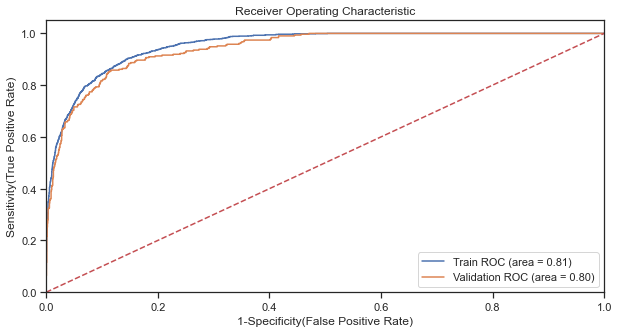

______________________________________________________
                        TRAIN                         
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6757
           1       0.79      0.64      0.71      1242

    accuracy                           0.92      7999
   macro avg       0.87      0.81      0.83      7999
weighted avg       0.91      0.92      0.92      7999

[[6550  207]
 [ 444  798]]

______________________________________________________
                      VALIDATION                      
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1690
           1       0.80      0.63      0.70       310

    accuracy                           0.92      2000
   macro avg       0.87      0.80      0.83      2000
weighted avg       0.91      0.92      0.91

In [66]:
HistogramGradBoost = HistGradientBoostingClassifier(
            random_state = None,
            learning_rate = 0.09,
            min_samples_leaf = 100,
            max_leaf_nodes = 10,
            warm_start = True,
            loss='auto',
            max_iter= 80,
            max_depth=5
        )

check_overfitting(data, target, random_state=100, remove_outliers=False, scale_data=False, model=HistogramGradBoost)

In [67]:
# Tune the parameters with a loop
for i in np.arange(5,12,1):
    
    print('\n', i)
    HistogramGradBoost = HistGradientBoostingClassifier(
            random_state = None,
            learning_rate =  0.1660000000000001,
            min_samples_leaf = 100,
            max_leaf_nodes = 13,
            warm_start = True,
            loss='auto',
            max_iter= 71,
            max_depth=i
        )

    # Call function with 5 stratified kfolds
    avg_score(data, target, split_method=skf, remove_outliers=False, scale_data=False, model=HistogramGradBoost)


 5

Average score of Train: 0.74393
Average score of Valid: 0.74406
Average of overfit: 0.03414

 6

Average score of Train: 0.74196
Average score of Valid: 0.74188
Average of overfit: 0.0314

 7

Average score of Train: 0.74948
Average score of Valid: 0.74962
Average of overfit: 0.03694

 8

Average score of Train: 0.7442
Average score of Valid: 0.74422
Average of overfit: 0.03346

 9

Average score of Train: 0.74512
Average score of Valid: 0.74487
Average of overfit: 0.04541

 10

Average score of Train: 0.74954
Average score of Valid: 0.74932
Average of overfit: 0.0417

 11

Average score of Train: 0.74848
Average score of Valid: 0.74821
Average of overfit: 0.04409


In [68]:
HistogramGradBoost = HistGradientBoostingClassifier(
        random_state = None,
        learning_rate =  0.1660000000000001,
        min_samples_leaf = 100,
        max_leaf_nodes = 13,
        warm_start = True,
        loss='auto',
        max_iter= 71,
        max_depth=8
    )

# Call function with 5 stratified kfolds
avg_score(data, target, split_method=skf, remove_outliers=False, scale_data=False, model=HistogramGradBoost)


Average score of Train: 0.7442
Average score of Valid: 0.74422
Average of overfit: 0.03346


In [79]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!! SUBMISSION 120 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
print(f'Overfitting between train and test(kaggle) is {round(0.72908-0.71186,5)}')
HistogramGradBoost = HistGradientBoostingClassifier(
        random_state = None,
        learning_rate =  0.1700000000000001,
        min_samples_leaf = 100,
        max_leaf_nodes = 11,
        warm_start = True,
        loss='auto',
        max_iter= 71,
        max_depth=6
    )

Overfitting between train and test(kaggle) is 0.01722


In [80]:
# Tune the parameters with a loop
for i in np.arange(5,12,1):
    
    print('\n', i)
    HistogramGradBoost = HistGradientBoostingClassifier(
            random_state = None,
            learning_rate =  0.1660000000000001,
            min_samples_leaf = 100,
            max_leaf_nodes = 13,
            warm_start = True,
            loss='auto',
            max_iter= 71,
            max_depth=i
        )

    # Call function with 5 stratified kfolds
    avg_score(data, target, split_method=skf, remove_outliers=False, scale_data=False, model=HistogramGradBoost)


 5

Average score of Train: 0.74393
Average score of Valid: 0.74406
Average of overfit: 0.03414

 6

Average score of Train: 0.74196
Average score of Valid: 0.74188
Average of overfit: 0.0314

 7

Average score of Train: 0.74948
Average score of Valid: 0.74962
Average of overfit: 0.03694

 8

Average score of Train: 0.7442
Average score of Valid: 0.74422
Average of overfit: 0.03346

 9

Average score of Train: 0.74512
Average score of Valid: 0.74487
Average of overfit: 0.04541

 10

Average score of Train: 0.74954
Average score of Valid: 0.74932
Average of overfit: 0.0417

 11

Average score of Train: 0.74848
Average score of Valid: 0.74821
Average of overfit: 0.04409


<a class="anchor" id="gb">

#### 5.3.7.7) Gradient Boost
    
</a> 

In [70]:
model_gb = GradientBoostingClassifier()

param_gb = {'max_depth': [8,10], 
            'min_samples_split': [500,600],
            'min_samples_leaf' : [500,600],
            'n_estimators' : [150,200,250],
            'learning_rate' : [0.08,0.1],
            'max_features': ['log2', 'sqrt'],
            'subsample': [0.8] }

#run_grid(data, target, random_state=0, remove_outliers=False, scale_data=False, model=model_gb, parameters=param_gb)

In [71]:
gradient_boost = GradientBoostingClassifier(
        #    loss='deviance',
            learning_rate=0.08,
            n_estimators=250,
            subsample= 0.8,
        #    criterion='friedman_mse',
            min_samples_split= 600,
            min_samples_leaf= 500,
        #    min_weight_fraction_leaf=0.0,
            max_depth= 6,
        #    min_impurity_decrease=0.0,
        #    min_impurity_split=None,
        #    init=None,
            random_state=None,
            max_features='sqrt',
        #    verbose=0,
        #    max_leaf_nodes=None,
            warm_start=False,
        #    validation_fraction=0.1,
        #    n_iter_no_change=None,
        #    tol=0.0001,
        #   ccp_alpha=0.0,
            )

# check_overfitting(data, target, random_state=0, remove_outliers=False, scale_data=False, model=gradient_boost)

In [72]:
# Call function with 10 kfolds
# avg_score(data, target, split_method=skf, remove_outliers=False, scale_data=False, model=gradient_boost)

<a class="anchor" id="s">

#### 5.3.7.8) Stacking
    
</a> 

In [ ]:
random_state = 0
X_train, X_val, y_train, y_val = train_test_split(data_selected_features, target, train_size=0.80, 
                                                  stratify = target, random_state=random_state)

scaler= MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

dt = DecisionTree.fit(X_train, y_train)
nn = NeuralNetwork.fit(X_train, y_train)
knn = model_KNN.fit(X_train, y_train)
nb = NaiveBayes.fit(X_train, y_train)
svm = SVM.fit(X_train, y_train)
bg = bagging.fit(X_train, y_train)
rf = Random_forest.fit(X_train, y_train)
erf = Extremely_Randomized_Trees.fit(X_train, y_train)
ab = ADABoost.fit(X_train, y_train)
hgb = HistogramGradBoost.fit(X_train, y_train)
gb = gradient_boost.fit(X_train, y_train)

In [ ]:
# Plot the accuracies
accuracies = [f1_score(y_val, dt.predict(X_val)), 
              f1_score(y_val, nn.predict(X_val)), 
              f1_score(y_val, knn.predict(X_val)),
              f1_score(y_val, nb.predict(X_val)), 
              f1_score(y_val, svm.predict(X_val)), 
              f1_score(y_val, bg.predict(X_val)),
              f1_score(y_val, rf.predict(X_val)), 
              f1_score(y_val, erf.predict(X_val)), 
              f1_score(y_val, ab.predict(X_val)),
              f1_score(y_val, gb.predict(X_val)),
              f1_score(y_val, hgb.predict(X_val))]

models = ['dt','nn','knn','nb','svm','bg','rf','erf','ab','gb','hgb']

data_tuples = list(zip(models, accuracies))
data_bars = pd.DataFrame(data_tuples)
data_bars = data_bars.sort_values(1)
plt.bar(data_bars[0], data_bars[1])
plt.ylim(0,1)
plt.show()

In [72]:
# Apply stacking to the best two models
estimators = [('hgb', HistogramGradBoost), 
              ('bg', bagging)]

###########################################################################################################
st = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_train, y_train)
###########################################################################################################

# Predict the dependent variable
y_train_pred = st.predict(X_train)
y_val_pred = st.predict(X_val)

# Calculate de f1 score
value_train = f1_score(y_train, y_train_pred)
value_val = f1_score(y_val, y_val_pred)

# Print the results  
print('\nScore of Train:', round(np.mean(value_train), 5))
print('Score of Valid:', round(np.mean(value_val), 5))
print(f'Difference between Train and Validation: {round(np.mean(value_train)-np.mean(value_val), 5)}')


Score of Train: 0.76082
Score of Valid: 0.67478
Difference between Train and Validation: 0.08604


In [1]:
# Plot the accuracies again
accuracies = [f1_score(y_val, dt.predict(X_val)), 
              f1_score(y_val, nn.predict(X_val)), 
              f1_score(y_val, knn.predict(X_val)),
              f1_score(y_val, nb.predict(X_val)), 
              f1_score(y_val, svm.predict(X_val)), 
              f1_score(y_val, bg.predict(X_val)),
              f1_score(y_val, rf.predict(X_val)), 
              f1_score(y_val, erf.predict(X_val)), 
              f1_score(y_val, ab.predict(X_val)),
              f1_score(y_val, gb.predict(X_val)),
              f1_score(y_val, hgb.predict(X_val)),
              f1_score(y_val, st.predict(X_val))]

models = ['dt','nn','knn','nb','svm','bg','rf','erf','ab','gb','hgb','st']

data_tuples = list(zip(models, accuracies))
data_bars = pd.DataFrame(data_tuples)
data_bars = data_bars.sort_values(1)
plt.bar(data_bars[0], data_bars[1])
plt.ylim(0,1)

NameError: name 'f1_score' is not defined

<a class="anchor" id="best">

### 5.3.8) Choose the Best Model and the Best Scalling Method
    
</a> 

In [73]:
best_model = HistogramGradBoost
#best_scalling = min_max2

#### Apply this to the entire dataset

In [74]:
# Apply best_model and best_scalling to the dataset with the selected features
remove_outliers = False
scale_data = False

X = data #data_selected_features
y = target

###################### REMOVE OUTLIERS #######################
if remove_outliers:
    X, y = removing_outliers(X, y)
        
###################### SCALE THE DATA ########################
if scale_data:

    #Separate data_selected_features in metric and non metric features
    data_metric = X.select_dtypes(include=np.number).set_index(data_selected_features.index)
    data_non_metric = X.select_dtypes(exclude=np.number).set_index(data_selected_features.index)

    # -------------- Create a scalling method --------------   
    best_scalling_fitted = best_scalling.fit(data_metric) # !!!!!!!!!!!!!!!!
    data_metric_scaled = best_scalling_fitted.transform(data_metric) 
    data_metric_scaled = pd.DataFrame(data_metric_scaled, columns = data_metric.columns).set_index(data_metric.index)  

    # Join the metric and non metric variables back together
    X = data_metric_scaled.join(data_non_metric)   


# Define our model and fit to our scalled data
best_model_fitted = best_model.fit(X, y) # !!!!!!!!!!!!!!!!

# Predict the dependent variable
predictions = best_model_fitted.predict(X)

# Calculate de f1 score
value_train = f1_score(y, predictions)

print('------------ FINAL MODEL ------------')
print('Average score:', round(np.mean(value_train), 5))

------------ FINAL MODEL ------------
Average score: 0.74834


<a class="anchor" id="deployment">

# 6) Model Deployment
    
</a>

In [75]:
test = pd.read_csv('test.csv')
test.head(3)

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor
0,798519314,24-Aug-20,0,0.0,0,0.0,86,5332.5478,0.0139,0.0654,0.0,Windows,2,Brazil,1,Returner
1,798663101,25-May-20,2,37.5,0,0.0,55,1420.4725,0.0012,0.0058,0.0,Android,1,Spain,4,Returner
2,798663221,2-Nov-20,0,0.0,0,0.0,36,788.5000,0.0000,0.0250,0.0,Windows,6,Spain,3,Returner


In [76]:
# Create a copy of test to store the column Access_ID
test_copy = test.copy()

#### Change type of variables

In [77]:
test = change_data_types(test)
test.dtypes

Access_ID                             string
Date                          datetime64[ns]
AccountMng_Pages                       int64
AccountMng_Duration                  float64
FAQ_Pages                              int64
FAQ_Duration                         float64
Product_Pages                          int64
Product_Duration                     float64
GoogleAnalytics_BounceRate           float64
GoogleAnalytics_ExitRate             float64
GoogleAnalytics_PageValue            float64
OS                                    string
Browser                               string
Country                               string
Type_of_Traffic                       string
Type_of_Visitor                       string
dtype: object

#### Check inchoerencies in the dataset

In [444]:
# test = inchorencies_check(test)
# test.shape

#### Create new variables

In [445]:
test = create_new_variables(test)
print(test.shape)

(2300, 70)


In [446]:
extra_feat_train = list(set(data.columns)-set(test.columns))

for feat in extra_feat_train:
    test[feat]=0
    
# -------------------------------------------------------------
extra_feat_test=list(set(test.columns)-set(data.columns))

for feat in extra_feat_test:
    test.drop(feat, axis=1, inplace=True)
    
print(data.shape)
print(test.shape)

(9999, 69)
(2300, 69)


In [447]:
# best_model_fitted
# best_scalling_fitted
scale_data = False

# Apply best_model_fitted and best_scaler to the dataset
test_data = test#[selected_features]

if scale_data:
    
    # Separate test_data in metric and non metric features
    test_data_metric = test_data.select_dtypes(include=np.number).set_index(test_data.index)
    test_data_non_metric = test_data.select_dtypes(exclude=np.number).set_index(test_data.index)

    # Use best_scaler created above
    test_data_metric_scaled = best_scalling_fitted.transform(test_data_metric) 
    test_data_metric_scaled = pd.DataFrame(test_data_metric_scaled, columns = test_data_metric.columns).set_index(test_data.index)

    # Join the test_data back together
    test_data = test_data_metric_scaled.join(test_data_non_metric)


# Use best_model_fitted created above to create new columns called 'Buy'
test_data['Buy'] = best_model_fitted.predict(test_data)

test_data.head(3)

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Apple,...,Browser_8,France,Germany,Italy,Other,Portugal,Spain,Switzerland,United Kingdom,Buy
0,0,0.0,0,0.0,86,5332.5478,0.0139,0.0654,0.0,False,...,False,False,False,False,False,False,False,False,False,0
1,2,37.5,0,0.0,55,1420.4725,0.0012,0.0058,0.0,False,...,False,False,False,False,False,False,True,False,False,0
2,0,0.0,0,0.0,36,788.5000,0.0000,0.0250,0.0,False,...,False,False,False,False,False,False,True,False,False,0


In [448]:
test_data['Buy'].value_counts()

0    2000
1     300
Name: Buy, dtype: int64

In [449]:
test_data['Access_ID'] = test_copy['Access_ID']

sample_submission = test_data[['Access_ID', 'Buy']]
sample_submission

,Access_ID,Buy
0,798519314,0
1,798663101,0
2,798663221,0
3,798760918,0
4,798856982,1
...,...,...
2295,962042726,0
2296,962063064,0
2297,962147749,1
2298,962182167,0


In [450]:
# Change name of file - TIAGO
sample_submission.to_csv(r'C:\Users\tsoom\OneDrive\Documentos\IMS - Data Science\Machine Learning\Github Project\Project-Machine-Learning\submissions\sub121.csv', index=False, sep=',')

text_file = open("submissions/sub121.txt", "w")
n = text_file.write(str(best_model))
text_file.close()  # exportar também o modelo utilizado, alterar numero aqui e no csv para a correspondencia estar certa

In [ ]:
# Change name of file  - JOHNNY
sample_submission.to_csv(r'C:\Users\Admin\Documents\GitHub\Project-Machine-Learning\submissions\35.csv', index=False, sep=',')

text_file = open("submissions/sub35.txt", "w")
#n = text_file.write((str(best_model)+'\n\n'+str(selected_variables)+'\n\n'+ str(best_scalling)+'\n\n'+ str(random_state)+'\n\nValue'+ str(round(np.mean(value_train), 5))+'\n\n'+ str(round(np.mean(value_val), 5))))
text_file.close()  # exportar também o modelo utilizado, alterar numero aqui e no csv para a correspondencia estar certa

In [ ]:
# Change name of file  - ODI
sample_submission.to_csv(r'C:\Users\Utilizador\OneDrive - NOVAIMS\Desktop\DataMining\Project-Machine-Learning\submissions\63.csv', index=False, sep=',')

text_file = open("submissions/sub63.txt", "w")
n = text_file.write((str(best_model)+'\n\n'+str(selected_features)+'\n\n'+ str(best_scalling)+'\n\n'+ str(random_state)+'\n\nValue'+ str(round(np.mean(value_train), 5))+'\n\n'+ str(round(np.mean(value_val), 5))))
text_file.close()  # exportar também o modelo utilizado, alterar numero aqui e no csv para a correspondencia estar certa

In [78]:
best_model

HistGradientBoostingClassifier(learning_rate=0.1700000000000001, max_depth=6,
                               max_iter=71, max_leaf_nodes=11,
                               min_samples_leaf=100, warm_start=True)